# Machine Learning final project-- Prediction of housing price

### Group members: Yuhao Wu yuw121@pitt.edu   Yuling Chen yuc104@pitt.edu

## Description of problems
With the high demand of living area, housing price is increasing rapidly. There are many reasons will influence the decision of choosing a house,but different features have different importance when evaluate the price of house. It is crucial to using various variables from every aspect of residential homes to predict the final price of each home.


## Dataset
We download the house price dataset from kaggle and did the data preprocessing.
First, we displaying a glimpse of the variables and then choose a feature randomly(in this project, we choose ground living area) to get the appropriate tendency of feature and target value. The figure 1 shows that it almost the linear regression, which make sense Then we got the correlation matrix to observe the relationship of various features and target value deeply.

Second, we plot the distribution diagram of saleprice(target value) and found that it is a right skew distribution, which was expected as few people can afford very expensive houses. However, linear regression model prefer to using the normal distribution data. We found a solution that use the numpy fuction log1p which applies log(1+x) to all elements of the column, which is an important step since it can improve the performance. 

There are 79 explantory variabels in the dataset, but some of them have lots of missing value, which not have any significance in prediction. So we calculate the percent of missing value for every feature and remove it when the value is large than 10%, which means at least 10% data are missing.So we drop the feature shows below: "PoolQC","MiscFeatureaxis","Alley","Fence", "FireplaceQu", "LotFrontage".

After remove some inconsequential features, we replacing missing data of categorial variables with "None" and for the numeric variables we replace them with "zero".In addition, we take some measures to deal with other features.For example. for the "Utilities" one, the data shows that all records are "AllPub", except for one "NoSeWa" and 2 NA value. In this condition, we can infer that this feature won't help more in prediction, so we remove it. The same as "KitchenQual" that have only one NA value, so we replace with the most common value. 

Finally, we split the train set and test set, also use the StandardScaler to proceed feature scale.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")


train_id=train['Id']
test_id=test['Id']

train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

print(train.columns)
print(train.head(10))
print(train.shape)
print(test.shape)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

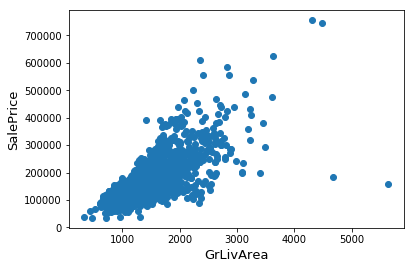

In [3]:
#figure 1
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

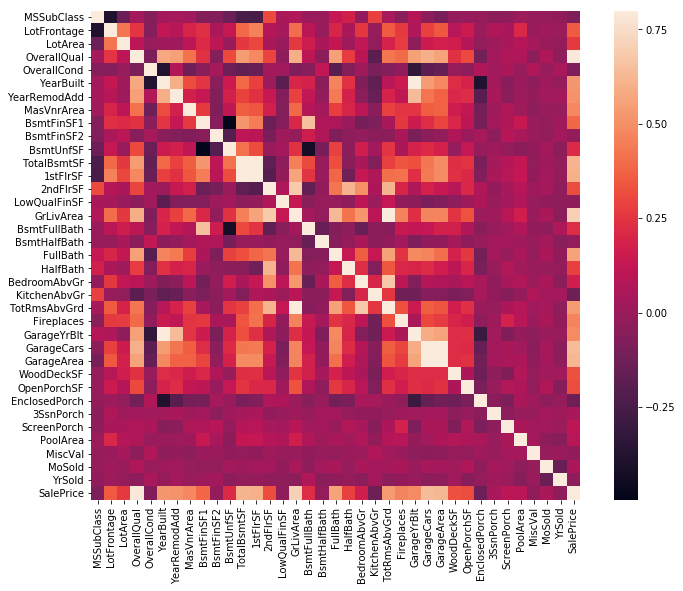

In [4]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);


 mu = 180921.20 and sigma = 79415.29



c:\users\yuw121\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'SalePrice distribution')

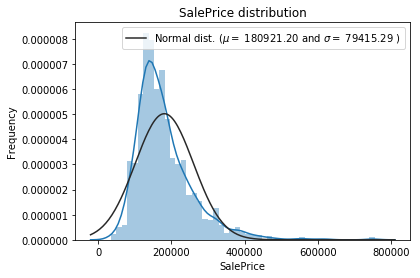

In [5]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')


 mu = 12.02 and sigma = 0.40



c:\users\yuw121\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'SalePrice distribution')

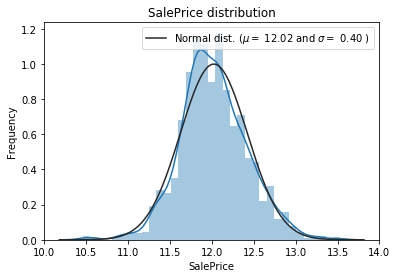

In [6]:
# The target variable is right skewed whereas linear models prefer normally distributed data , 
# So we use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

In [7]:
# combine train and test data to preprocess
# ntrain = train.shape[0]                                        
# ntest = test.shape[0]
# Y_train = train['SalePrice'].values

data = pd.concat((train, test)).reset_index(drop=True)
data.drop(['SalePrice'], axis=1, inplace=True)
print(data.shape)

(2919, 79)


In [8]:
# missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

print(missing_data[missing_data['Percent']>0])

data=data.drop(['PoolQC'],axis=1)
data=data.drop(['MiscFeature'],axis=1)
data=data.drop(['Alley'],axis=1)
data=data.drop(['Fence'],axis=1)
data=data.drop(['FireplaceQu'],axis=1)
data=data.drop(['LotFrontage'],axis=1)

              Total   Percent
PoolQC         2909  0.996574
MiscFeature    2814  0.964029
Alley          2721  0.932169
Fence          2348  0.804385
FireplaceQu    1420  0.486468
LotFrontage     486  0.166495
GarageFinish    159  0.054471
GarageQual      159  0.054471
GarageYrBlt     159  0.054471
GarageCond      159  0.054471
GarageType      157  0.053786
BsmtCond         82  0.028092
BsmtExposure     82  0.028092
BsmtQual         81  0.027749
BsmtFinType2     80  0.027407
BsmtFinType1     79  0.027064
MasVnrType       24  0.008222
MasVnrArea       23  0.007879
MSZoning          4  0.001370
BsmtHalfBath      2  0.000685
Utilities         2  0.000685
Functional        2  0.000685
BsmtFullBath      2  0.000685
Electrical        1  0.000343
Exterior2nd       1  0.000343
KitchenQual       1  0.000343
GarageCars        1  0.000343
Exterior1st       1  0.000343
GarageArea        1  0.000343
TotalBsmtSF       1  0.000343
BsmtUnfSF         1  0.000343
BsmtFinSF2        1  0.000343
BsmtFinSF1

In [9]:
# Replacing missing data 


for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    data[col] = data[col].fillna('None')
    
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    data[col] = data[col].fillna(0)

for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    data[col] = data[col].fillna(0)
    
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    data[col] = data[col].fillna('None')

# NA most likely means no masonry veneer for these houses. 
# We can fill 0 for the area and None for the type.

data["MasVnrType"] = data["MasVnrType"].fillna("None")
data["MasVnrArea"] = data["MasVnrArea"].fillna(0)

# MSZoning: 'RL' is the most common value ,so we fillna with the first record
data['MSZoning'] = data['MSZoning'].fillna(data['MSZoning'].mode()[0])

# Functional : NA means typical
data["Functional"] = data["Functional"].fillna("Typ")

# Utilities: all records are "AllPub", except for one "NoSeWa" and 2 NA
# this feature won't help in predictive modelling. We can then safely remove it.
data = data.drop(['Utilities'], axis=1)

# Exterior1st and Exterior2nd replace with the most common value
data['Exterior1st'] = data['Exterior1st'].fillna(data['Exterior1st'].mode()[0])
data['Exterior2nd'] = data['Exterior2nd'].fillna(data['Exterior2nd'].mode()[0])

# Electrical: 'SBrkr' is the most common value, so we fillna with the first record
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])

# SaleTpe: replace with the most common value
data['SaleType'] = data['SaleType'].fillna(data['SaleType'].mode()[0])

# KitchenQual : only one NA, replace with the most common value
data['KitchenQual'] = data['KitchenQual'].fillna(data['KitchenQual'].mode()[0])



In [10]:
#Check if there are any remaining missing values 
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head()

,Missing Ratio


In [11]:
#log transform skewed numeric features:
numeric_feats = data.dtypes[data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

data[skewed_feats] = np.log1p(data[skewed_feats])

In [12]:
# change categorial and some numeric variables to number
data = pd.get_dummies(data)
print(data.shape)

(2919, 276)


In [13]:
# split the train set and test set, also use the StandardScaler to proceed feature scale
from sklearn.preprocessing import StandardScaler
X_train=data[:train.shape[0]]
X_test=data[train.shape[0]:]
Y_train=train.SalePrice

print(X_train.head())

sd=StandardScaler()
X_train=sd.fit_transform(X_train)
X_test=sd.fit_transform(X_test)

print(X_train.shape)
print(X_test.shape)

   1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtFinSF1  BsmtFinSF2  \
0  6.753438  6.751101        0.0             3    6.561031         0.0   
1  7.141245  0.000000        0.0             3    6.886532         0.0   
2  6.825460  6.765039        0.0             3    6.188264         0.0   
3  6.869014  6.629363        0.0             3    5.379897         0.0   
4  7.044033  6.960348        0.0             4    6.486161         0.0   

   BsmtFullBath  BsmtHalfBath  BsmtUnfSF  EnclosedPorch     ...       \
0           1.0      0.000000   5.017280       0.000000     ...        
1           0.0      0.693147   5.652489       0.000000     ...        
2           1.0      0.000000   6.075346       0.000000     ...        
3           1.0      0.000000   6.293419       5.609472     ...        
4           1.0      0.000000   6.196444       0.000000     ...        

   SaleType_CWD  SaleType_Con  SaleType_ConLD  SaleType_ConLI  SaleType_ConLw  \
0             0             0            

## Related work

### Techniques 
We apply 10-folds cross-validation function for calculating rmse in different features then get the average value. Then we tried to get the relative importance of variables with linear regression.

First, we choose the Ridge regression that can reduce variance when features are too much. The most important thing is to set the alpha value. If alpha close to zero, which is least square estimates. If alpha is too large, which means coefficients will shrink to zero. After many times of attempt and observation,finally we set the alpha shows below: alphas = [0.05, 0.1, 1, 5, 10, 50,100,200,300,400,500,1000]. Through observe the validation diagram, we found that the lower point achieves the best bias-variance tradeoff and got the average rmse is 0.126.

Second, we choose the Lasso regression that performs better in feature selection. Through the formula,we know that the penalty term is cotrolled by alpha and the bridges the gap between Lasso(alpha=1)and Ridge(alpha=0).The tuning parameter lambda controls the overall strength of the penalty. For example, when alpha is too large, some coefficients will be force to zero, which will remove some irrelevant features that may affect the performance.Through analyzing the result, we see the rmse of Lasso is 0.122 that is better than Ridge.Except of it, we can also use Lasso regression to remove some unrelated features. We check the coefficient of various features, if the coefficient equal to zero, we remove it. Finally, we keep 86 variables and remove other 190 variables. This procedure will improve the performance. Besides, we plot the top 10 of positive and negative features to get the relationship of features and SalePrice. Through this figure, we found that ground living area, overall quality and year of built are the most feature that the customer will consider to buy a house. It is reasonable with the actual conditions. 

Finally, we choose the random forest model since it performs better when features are too much. We import three packages: "GridSearchCV" and "randomizedSearchCV" is to search over specified parameter values for an estimator, "ShuffleSplitRandom" is a permutation cross-validator, which set the seeds to make sure the data is consistent. We tried different parameter set, such as set estimator from 100,120,140, set min leaf number from 1,2,3, set max depath from 10,15,20. Then we found that the best parameters are  'n_estimators'is 120, 'min_samples_leaf'is 1, 'max_depth'is 20. With the best parameter we get the accuracy of random forest is 98.22.

### Limitations 
Ridge regression cannot did feature selection, it may lower the accuracy.
Lasso regression did the feature selection, which sometimes no good since it may miss some not very related but important features.
Random forest may be overfitting.


In [14]:
# We use the cross_val_score function of Sklearn
# 10-folds Cross-Validation function
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso,LassoCV
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

n_folds = 10

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model,X_train, Y_train, scoring="neg_mean_squared_error", cv = n_folds))
    return(rmse)

RMSE of ridge is  0.12629797128666684


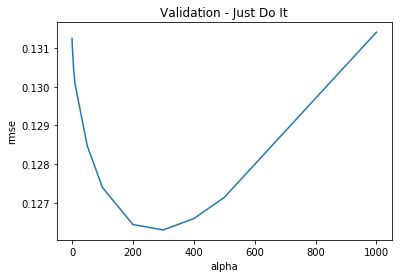

In [15]:
# L2 Ridge regularization

alphas = [0.05, 0.1, 1, 5, 10, 50,100,200,300,400,500,1000]
Ridge_cv = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

Ridge_cv = pd.Series(Ridge_cv, index = alphas)
Ridge_cv.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

print("RMSE of ridge is ",Ridge_cv.min())

In [16]:
# # L1 Lasso regularization

model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.005]).fit(X_train, Y_train)
print("RMSE of lasso model is ",rmse_cv(model_lasso).mean())
lasso_pred=model_lasso.predict(X_test)

acc_lasso = round(model_lasso.score(X_train, Y_train) * 100, 2)
print("Accuracy of random forest is ",acc_lasso)

RMSE of lasso model is  0.12288948287560617
Accuracy of random forest is  93.13


In [17]:

coef = pd.Series(model_lasso.coef_, index = data.columns)

print("We choose " + str(sum(coef != 0)) + " variables and remove the other " +  str(sum(coef == 0)) + " variables")

We choose 85 variables and remove the other 191 variables


Text(0.5,1,'Coefficients in the Lasso Model')

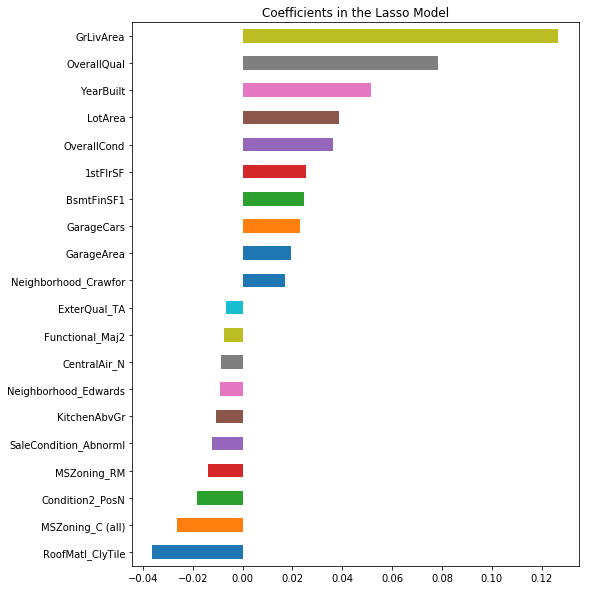

In [18]:
# plot the top 10 positive and negative relative variables
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

In [19]:
# random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV # Search over specified parameter values for an estimator.
from sklearn.model_selection import RandomizedSearchCV # Search over specified parameter values for an estimator.
from sklearn.model_selection import ShuffleSplit # Random permutation cross-validator
from time import time
from sklearn.metrics import r2_score, make_scorer, mean_squared_error

random_forest = RandomForestRegressor() 
random_forest.fit(X_train, Y_train)
random_forest_pred = random_forest.predict(X_test)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print("Accuracy of random forest is ",acc_random_forest)



Accuracy of random forest is  97.48


In [20]:
# estimator from 100,120,140
# min leaf number from 1,2,3
# max depath from 10,15,20

start = time() # Get start time

rf_regressor = RandomForestRegressor(random_state=42)
cv_sets = ShuffleSplit(random_state = 4) # shuffling our data for cross-validation
parameters = {'n_estimators':[100, 120, 140], 
              'min_samples_leaf':[1, 2, 3], 
              'max_depth':[10,15,20]}
scorer = make_scorer(r2_score)
n_iter_search = 10
grid_obj = RandomizedSearchCV(rf_regressor, 
                              parameters, 
                              n_iter = n_iter_search, 
                              scoring = scorer, 
                              cv = cv_sets,
                              random_state= 99)
grid_fit = grid_obj.fit(X_train, Y_train)
rf_opt = grid_fit.best_estimator_

end = time() # Get end time
# Calculate training time
rf_time = (end-start)/60
print('It took {0:.2f} minutes for RandomSearchCV to converge to optimised parameters for the RF model'.format(rf_time))

It took 4.02 minutes for RandomSearchCV to converge to optimised parameters for the RF model


In [21]:
grid_fit.best_params_

{'n_estimators': 120, 'min_samples_leaf': 1, 'max_depth': 20}

In [22]:
# best parameter
best_rf = RandomForestRegressor(
    max_depth = 20,
    min_samples_leaf = 1,
    n_estimators = 120,                                                                  
    random_state=42)
best_rf.fit(X_train, Y_train)
best_rf_pred = best_rf.predict(X_test) # RF predictions

acc_best_rf=round(best_rf.score(X_train,Y_train)*100,2)
print("When choose the best parameter, Accuracy of random forest is ",acc_best_rf)

When choose the best parameter, Accuracy of random forest is  98.22


In [23]:
# plt.plot("rf",acc_random_forest,'o')
# plt.plot("best_rf",acc_best_rf,'o')

In [24]:
random_forest_pred = np.expm1(random_forest_pred)
best_rf_pred=np.expm1(best_rf_pred)
lasso_pred=np.expm1(lasso_pred)

In [25]:
sub = pd.DataFrame()
sub['Id'] = test_id
sub['SalePrice'] = lasso_pred
sub.to_csv('submission_lasso.csv',index=False)

## Evaluations and Analysis
We submit our project in kaggle and get the result, it shows that lasso regression is the best one, which maybe because the random forest is overfitting, the accuracy will decreasing.

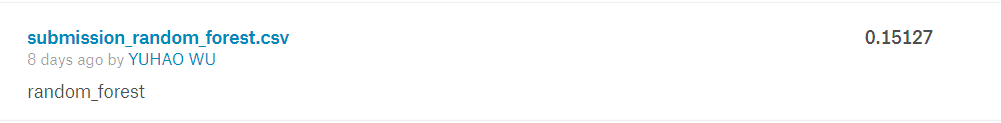

In [26]:
from IPython.display import Image
Image(filename='./11.png', width=900, height=600)

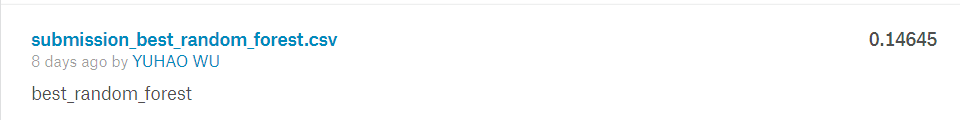

In [27]:
from IPython.display import Image
Image(filename='./22.png', width=900, height=600)

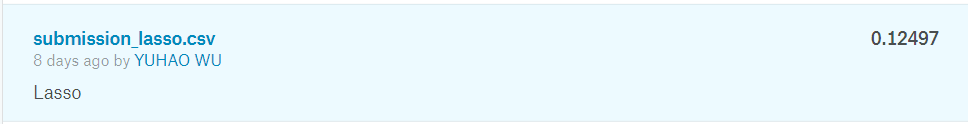

In [28]:
from IPython.display import Image
Image(filename='./33.png', width=900, height=600)